In [11]:
%matplotlib inline
import scipy
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# custom libraries used
from models.grid_world import Experiment
from models.agents import IndependentClusterAgent, JointClusteringAgent, FlatAgent, MetaAgent
from models.experiment_designs.experiment_3a import gen_task_param as gen_task_param_a
from models.experiment_designs.experiment_3b import gen_task_param as gen_task_param_b

sns.set_context('paper', font_scale=1.5)

In [2]:
n_sims = 129
prunning_threshold = 10.
evaluate = False

np.random.seed(11223344)

# alpha is sample from the distribution
# log(alpha) ~ N(alpha_mu, alpha_scale)
alpha_mu = 0.0
alpha_scale = 1.0

inv_temp = 2.5
goal_prior = 10e-20 
prunning_threshold = 10.0
evaluate = True

# pre generate a set of tasks for consistency. 
list_tasks_a = [gen_task_param_a() for _ in range(n_sims)]
list_tasks_b = [gen_task_param_b() for _ in range(n_sims)]

# pre draw the alphas for consistency
list_alpha = [np.exp(scipy.random.normal(loc=alpha_mu, scale=alpha_scale)) 
              for _ in range(n_sims)]

def sim_agent(AgentClass, name='None', flat=False):
    
    results = []
    for task, list_task in zip(['A', 'B'], [list_tasks_a, list_tasks_b]):
    
        for ii, (task_args, task_kwargs) in tqdm(enumerate(list_task)):
            if not flat:
                agent_kwargs = dict(alpha=list_alpha[ii], inv_temp=inv_temp, 
                                    goal_prior=goal_prior)
            else:
                agent_kwargs = dict(inv_temp=inv_temp, goal_prior=goal_prior)        
            agent = AgentClass(Experiment(*task_args, **task_kwargs), **agent_kwargs)

            _res = agent.generate(evaluate=evaluate, prunning_threshold=prunning_threshold)
            _res[u'Model'] = name
            _res[u'Iteration'] = [ii] * len(_res)
            _res[u'Task'] = [task] * len(_res)
            results.append(_res)
    
        
    return pd.concat(results)


In [3]:
results_meta = sim_agent(MetaAgent, name='Meta')
results_ic = sim_agent(IndependentClusterAgent, name='Independent')
results_jc = sim_agent(JointClusteringAgent, name='Joint')
results_fl = sim_agent(FlatAgent, name='Flat', flat=True)
results    = pd.concat([results_ic, results_jc, results_fl, results_meta])

HBox(children=(IntProgress(value=1, bar_style=u'info', max=1), HTML(value=u'')))

HBox(children=(IntProgress(value=1, bar_style=u'info', max=1), HTML(value=u'')))

HBox(children=(IntProgress(value=1, bar_style=u'info', max=1), HTML(value=u'')))

HBox(children=(IntProgress(value=1, bar_style=u'info', max=1), HTML(value=u'')))

HBox(children=(IntProgress(value=1, bar_style=u'info', max=1), HTML(value=u'')))

HBox(children=(IntProgress(value=1, bar_style=u'info', max=1), HTML(value=u'')))

HBox(children=(IntProgress(value=1, bar_style=u'info', max=1), HTML(value=u'')))

HBox(children=(IntProgress(value=1, bar_style=u'info', max=1), HTML(value=u'')))

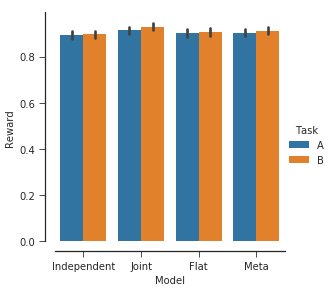

In [4]:
with sns.axes_style('ticks'):
    df0 = results[results['In Goal'] & (results.Context <= 2)]
    sns.factorplot(hue='Task', y='Reward', data=df0, kind='bar',
                  x='Model', units='Iteration')
    sns.despine(offset=10)

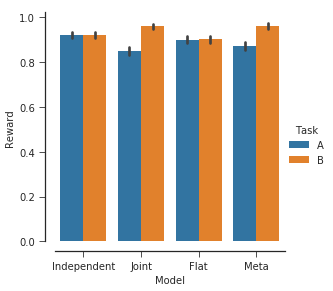

In [5]:
with sns.axes_style('ticks'):
    df0 = results[results['In Goal'] & (results.Context > 2)]
    sns.factorplot(hue='Task', y='Reward', data=df0, kind='bar',
                  x='Model', units='Iteration')
    sns.despine(offset=10)

/anaconda2/envs/compgen/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda2/envs/compgen/lib/python2.7/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


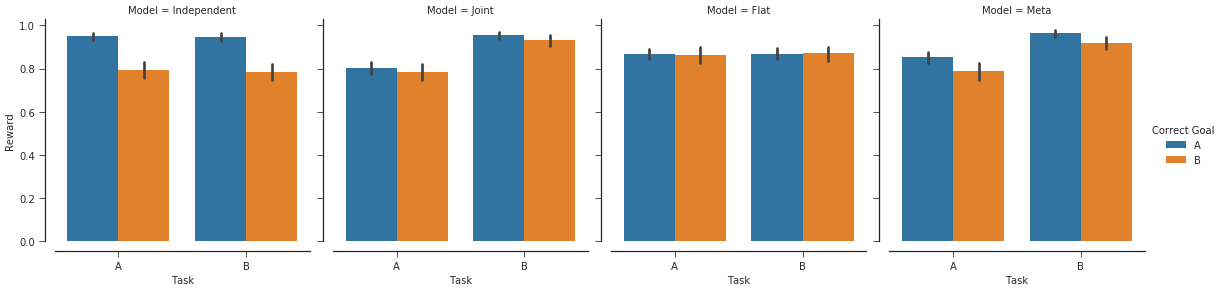

In [6]:
with sns.axes_style('ticks'):
    df0 = results[results['In Goal'] & (results.Context > 2) & 
                  (results['Times Seen Context'] <= 4)]
    df0['Correct Goal'] = ['A'] * len(df0)
    df0.loc[df0.Context == 5, 'Correct Goal'] = 'B'
    sns.factorplot(
        hue='Correct Goal', y='Reward', data=df0, kind='bar', col='Model',
        x='Task', units='Iteration'
    )
    sns.despine(offset=10)

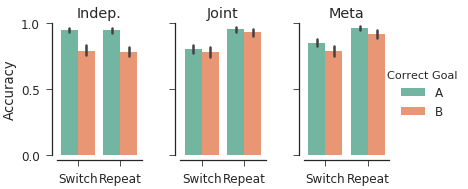

In [29]:
with sns.axes_style('ticks'):
    df0 = results[results['In Goal'] & (results.Context > 2) & 
                  (results['Times Seen Context'] <= 4) & (results['Model'] != 'Flat')].copy()
    df0['Correct Goal'] = ['A'] * len(df0)
    df0.loc[df0.Context == 5, 'Correct Goal'] = 'B'
    g = sns.factorplot(
        hue='Correct Goal', y='Reward', data=df0, kind='bar', col='Model',
        x='Task', units='Iteration', 
        palette='Set2', size=3.0, aspect=0.63
    )
    sns.despine(offset=5)
    
    g.set_xticklabels('Switch Repeat'.split())
    g.set_xlabels('')
    g.set_ylabels('Accuracy')
    g.axes[0][0].set_yticks(np.arange(0, 1.01, 0.5))
    g.axes[0][0].set_ylim(0, 1)
    
    g.axes[0][0].set_title('Indep.')
    g.axes[0][1].set_title('Joint')
    g.axes[0][2].set_title('Meta')


    plt.savefig('exp3_fig_models.png', dpi=300, bbox_inches='tight')
    

In [19]:
g.axes[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13c8569d0>,
      dtype=object)

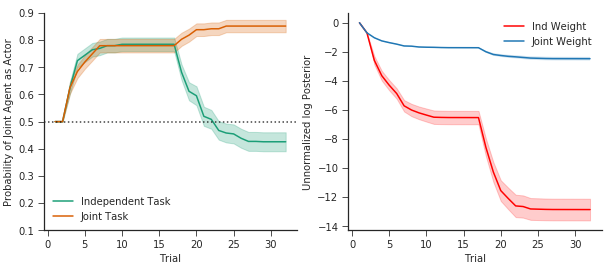

In [23]:
from matplotlib.ticker import NullFormatter

cc = sns.color_palette('Dark2')

with sns.axes_style('ticks'):

    df0 = results_wMeta[(results_wMeta['Steps Taken']==1) & 
                  (results_wMeta['Model'] == 'Meta') & (results_wMeta.Task == 'A')
                 ].copy()

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    ax = axes[0]
    x = range(1, int(df0['Trial Number'].max()) + 2)
    y = df0.groupby('Trial Number')['Joint Probability'].mean()
    y_err = df0.groupby('Trial Number')['Joint Probability'].std() / np.sqrt(n_sims)
    ax.plot(x, y, '-', color=cc[0], label='Independent Task')
    ax.fill_between(x, y-y_err, y+y_err, alpha=0.25, color=cc[0])

    
    df0 = results_wMeta[(results_wMeta['Steps Taken']==1) & 
              (results_wMeta['Model'] == 'Meta') & (results_wMeta.Task == 'B')
             ].copy()

    x = range(1, int(df0['Trial Number'].max()) + 2)
    y = df0.groupby('Trial Number')['Joint Probability'].mean()
    y_err = df0.groupby('Trial Number')['Joint Probability'].std() / np.sqrt(n_sims)
    ax.plot(x, y, '-',  color=cc[1], label='Joint Task')
    ax.fill_between(x, y-y_err, y+y_err, alpha=0.25,  color=cc[1])
    ax.set_ylabel('Probability of Joint Agent as Actor')
    ax.set_xlabel('Trial')
    xlb, xub = ax.get_xlim()
    ax.plot([xlb, xub], [0.5, 0.5], 'k:', alpha=0.75)
    ax.set_xlim(xlb, xub)
    ax.set_ylim([0.1, 0.9])
    ax.legend()
    
    ax = axes[1]
    y = df0.groupby('Trial Number')['Ind Weight'].mean()
    y_err = df0.groupby('Trial Number')['Ind Weight'].std() / np.sqrt(n_sims)
    ax.plot(x, y, 'r-')
    ax.fill_between(x, y-y_err, y+y_err, alpha=0.2, color='r')

    y = df0.groupby('Trial Number')['Joint Weight'].mean()
    y_err = df0.groupby('Trial Number')['Joint Weight'].std() / np.sqrt(n_sims)
    ax.plot(x, y, '-')
    ax.fill_between(x, y-y_err, y+y_err, alpha=0.2)
    plt.legend(loc='best')
    ax.set_xlabel('Trial')
    ax.set_ylabel('Unnormalized log Posterior')    
    ax.set_xlim(xlb, xub)

    plt.subplots_adjust(hspace=0.3)
    sns.despine()
    plt.savefig('Exp3_fig4.png', dpi=300)

In [17]:
sns.choose_colorbrewer_palette('qual')

interactive(children=(Dropdown(description=u'name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Pastel1', 'Pastel2', 'Dark2'), value='Set1'), IntSlider(value=9, description=u'n', max=16, min=2), FloatSlider(value=1.0, description=u'desat', max=1.0), Output()), _dom_classes=('widget-interact',))

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]